<a href="https://colab.research.google.com/github/mobassir94/Practicing-Tensorflow/blob/master/LinearModel_In_Tensorflow_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [0]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

**Loading MNIST handwritten digit dataset**

In [154]:
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets("data/MNIST", one_hot = True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [155]:
print("Size of Training set : ",len(data.train.labels))

print("Size of Testing set : ",len(data.test.labels))

print("Size of Validation set : ",len(data.validation.labels))


print("First 5 testing samples in one hot encoded format : ")
data.test.labels[0:5,:]


Size of Training set :  55000
Size of Testing set :  10000
Size of Validation set :  5000
First 5 testing samples in one hot encoded format : 


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [156]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

print("One Hot Encoding to Argmax : ")

print(data.test.labels[0:5])

img_size = 28

img_shape = (28,28)


img_size_flat = img_size * img_size #mnist dataset's pictures contain 28x28 image samples

num_classes = 10



One Hot Encoding to Argmax : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**PLACEHOLDER variables**

In [0]:
X = tf.placeholder(tf.float32, [None, img_size_flat])

y_true = tf.placeholder(tf.float32, [None, num_classes])

y_true_cls = tf.placeholder(tf.int64, [None]) #onehot to argmax

**Variables to be optimized**

In [0]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

biases = tf.Variable(tf.zeros([num_classes]))

***MODEL***

In [0]:
logits = tf.matmul(X, weights) +  biases

y_pred = tf.nn.softmax(logits)

y_pred_cls = tf.argmax(y_pred, dimension = 1)

**Cost Function**

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_true) #using logits because it computes softmax internally

cost = tf.reduce_mean(cross_entropy) # taking average of cross_entropy for all the image classifications

**Optimizer**

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

**Performance Measurement**

In [0]:
correct_prediction = tf.equal(y_pred_cls,y_true_cls) #calculating the average of 0 and 1 class

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #number of correct classified images / total number of images

**Creating Tensorflow Session**

In [0]:
session = tf.Session()

session.run(tf.initialize_all_variables()) # initializes all the variables

**Using Stochastic Gradient Descent for Computing the gradients**

In [0]:
batch_size = 100 #after each iteration of the optimizer we just calculate for  100 gradient for the training set images

In [0]:
def optimize(num_iterations):
  for i in range(num_iterations):
  
      X_batch, y_true_batch = data.train.next_batch(batch_size) #finding next batches
    
      feed_dict_train = {X : X_batch, y_true : y_true_batch} # x_batch stores 100 batch images and y_true_batch = corresponding labels
      
      
      session.run(optimizer, feed_dict = feed_dict_train)
      
      ##tensorflow assigns variables to the feed_dict_train to the placeholder variables and then runs the optimizer.
      
      

**Showing performance using helper function**

In [0]:
feed_dict_test = {X : data.test.images,
                y_true : data.test.labels,
                y_true_cls : data.test.cls}


#function for printing classification accuracy on the test set

def print_accuracy():
  acc = session.run(accuracy, feed_dict = feed_dict_test)
  
  print('accuracy on the test set : {0:.1%}'.format(acc))

**Confusion Matrix**

In [0]:
def print_confusion_matrix():
  cls_true = data.test.cls #true classifications for the test set
  cls_pred = session.run(y_pred_cls, feed_dict = feed_dict_test) #predicted classifications for the test set
  cm = confusion_matrix(y_true = cls_true,
                       y_pred = cls_pred)
  
  print(cm)
  
  #plotting the confusion matrix as image
  
  plt.imshow(cm, interpolation= 'nearest', cmap = plt.cm.Blues)
  
  plt.tight_layout()
  
  plt.colorbar()
  
  tick_marks = np.arange(num_classes)
  
  plt.xticks(tick_marks, range(num_classes))
  
  plt.yticks(tick_marks, range(num_classes))
  
  plt.xlabel('predicted')
  
  plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
  plt.show()

**Plotting the model weights**

In [0]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

**Performance After 1000 optimization iteration**

In [169]:
# We have already performed 1 iteration.
optimize(num_iterations=10000)

print_accuracy()

accuracy on the test set : 91.0%


**Plotting weights**

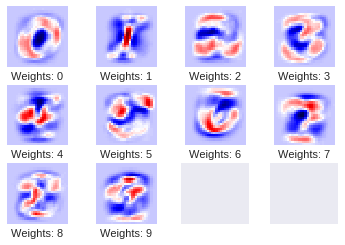

[[ 958    0    3    2    0    4    9    1    3    0]
 [   0 1102    2    4    1    2    4    1   19    0]
 [  11    8  898   15   15    1   16   18   41    9]
 [   5    1   19  907    1   27    4   13   22   11]
 [   1    4    6    1  911    1   10    1    8   39]
 [  12    4    5   42   12  747   16   10   35    9]
 [  15    3    5    2   13   15  902    1    2    0]
 [   3   19   24    6   10    0    0  925    3   38]
 [   9    9    8   26    8   21   12   13  855   13]
 [  11    8    5   11   40   12    0   18    6  898]]


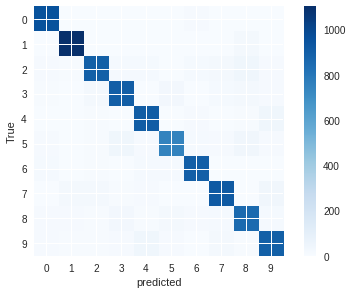

In [170]:
plot_weights()

print_confusion_matrix()

[[ 958    0    3    2    0    4    9    1    3    0]
 [   0 1102    2    4    1    2    4    1   19    0]
 [  11    8  898   15   15    1   16   18   41    9]
 [   5    1   19  907    1   27    4   13   22   11]
 [   1    4    6    1  911    1   10    1    8   39]
 [  12    4    5   42   12  747   16   10   35    9]
 [  15    3    5    2   13   15  902    1    2    0]
 [   3   19   24    6   10    0    0  925    3   38]
 [   9    9    8   26    8   21   12   13  855   13]
 [  11    8    5   11   40   12    0   18    6  898]]


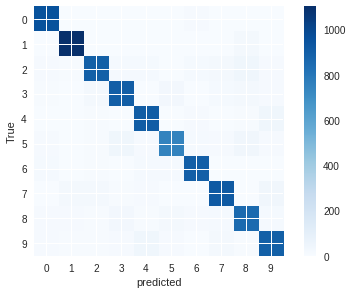

In [171]:
print_confusion_matrix()